


























 <u><b> Objective </b></u>
## <b> This project will focus on predicting heart disease using neural networks. Based on attributes such as blood pressure, cholestoral levels, heart rate, and other characteristic attributes, patients will be classified according to varying degrees of coronary artery disease. This project will utilize a dataset of 303 patients and distributed by the UCI Machine Learning Repository.

## <b>Machine learning and artificial intelligence is going to have a dramatic impact on the health field; as a result, familiarizing yourself with the data processing techniques appropriate for numerical health data and the most widely used algorithms for classification tasks is an incredibly valuable use of your time! </b>

<br>
<br>

## <b>Things to do :</b>
* ### Read the heart.csv data, clean the data and normalise the features.
* ### Split the data into train and test. 
* ### Use the keras package to build the model. The code to build such a model is provided below:
* ### Evaluate the model across various metrics. 





In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Explore the keras package to understand how the code works

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Alma Submission/AlmaBetter/Cohort Aravali/Module 3/Week 3/Day 4/heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Let's begin with Exploratory Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


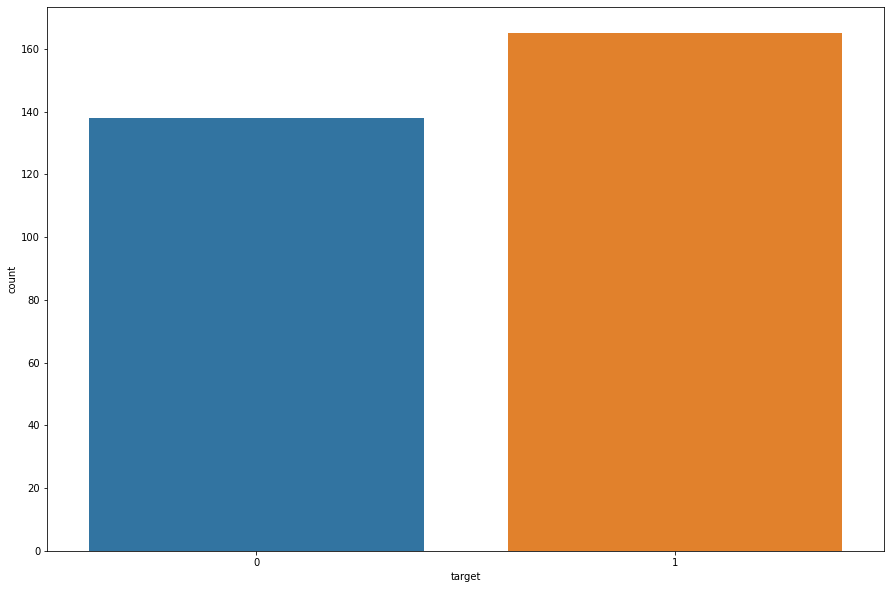

In [6]:
# Dependent variable 'Price'
plt.figure(figsize=(15,10))
sns.countplot(df['target'])

# Seems like a balanced dataset

# Segregating features in categorical and continuous 

In [7]:
independent_features = df.iloc[:,:-1]
dependent_feature = df.iloc[:,-1]

In [8]:
categorical_features = [col for col in independent_features.columns if (len(df[col].unique()) <= 10)]

In [9]:
continuous_feautures = [col for col in independent_features.columns if (len(df[col].unique()) > 10)]

In [10]:
categorical_features

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [11]:
continuous_feautures

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

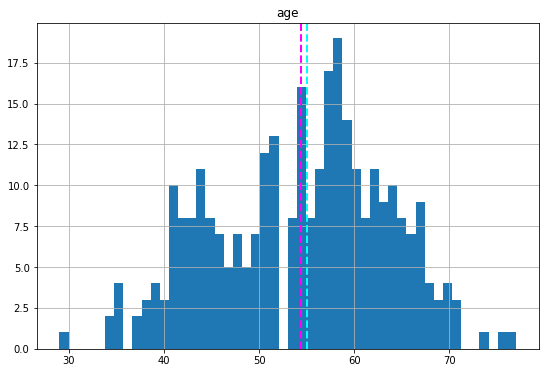

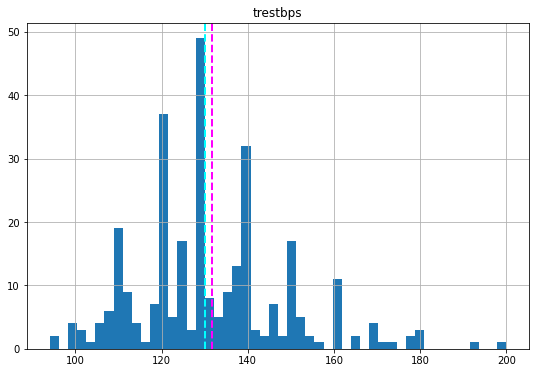

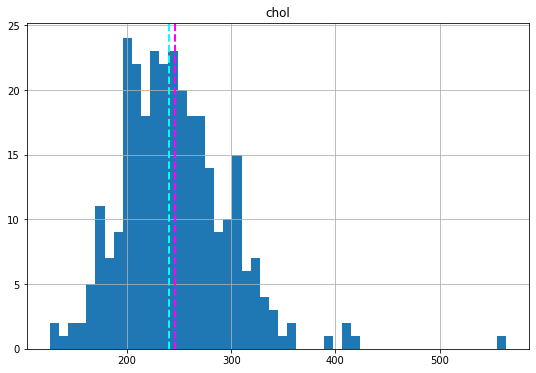

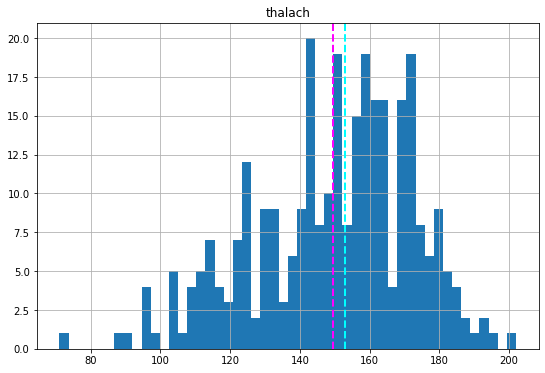

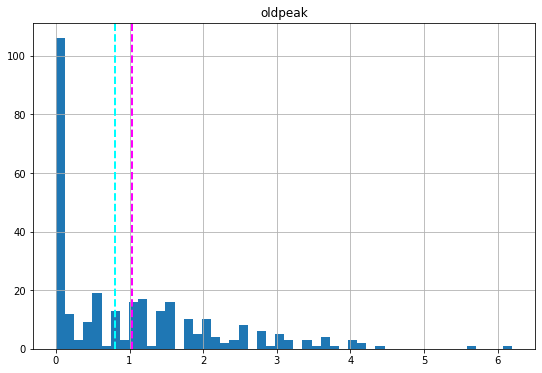

In [12]:
# Districution of continuous variable
for col in continuous_feautures:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

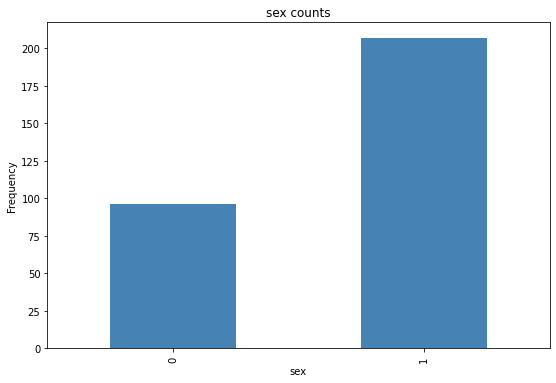

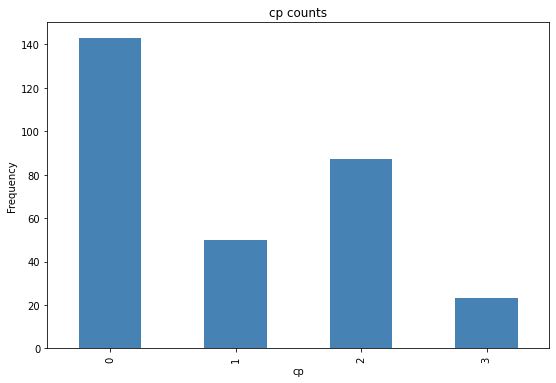

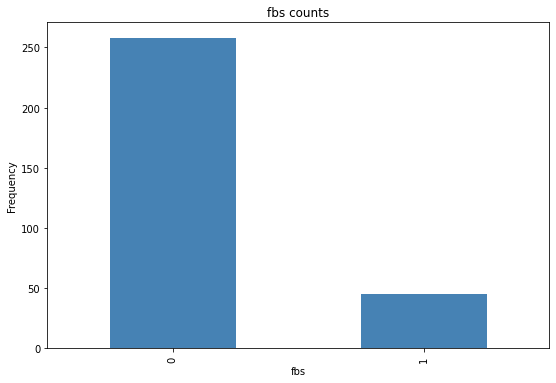

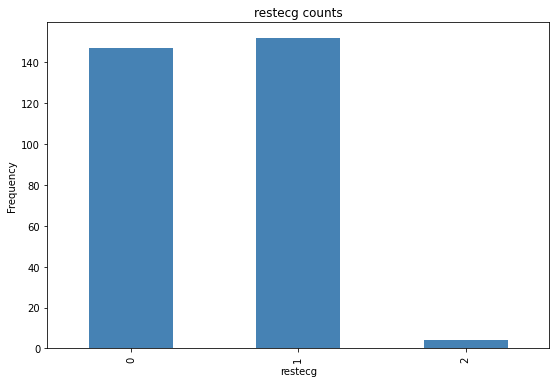

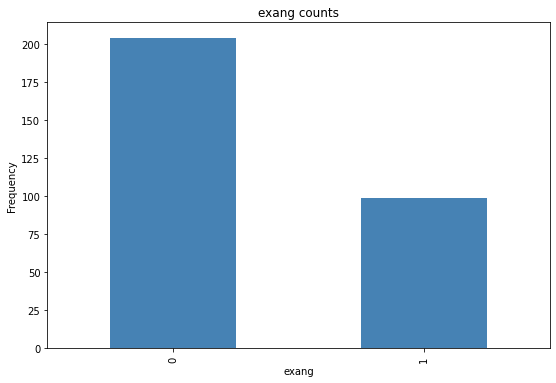

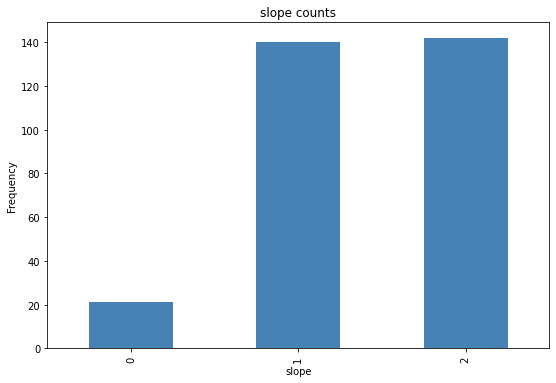

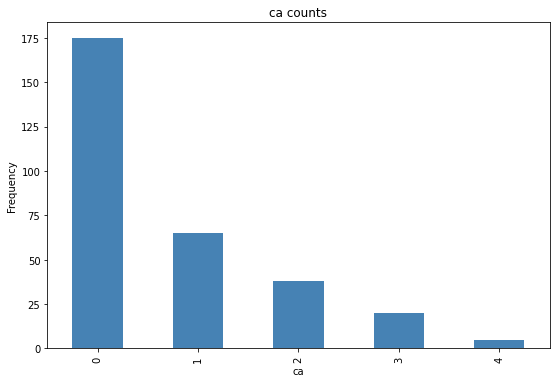

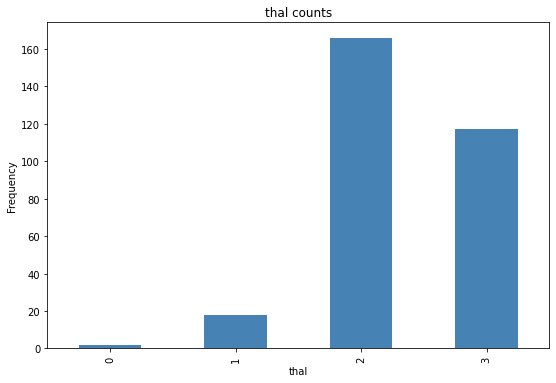

In [13]:
# Distribution of categorical variable
for col in categorical_features:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

# Preparing Data for modelling

In [14]:
df_pr = df.copy()

In [15]:
from scipy.stats import zscore
df_pr[continuous_feautures] = df_pr[continuous_feautures].apply(zscore)

In [16]:
df_pr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0,0,0.478391,-0.101730,0,1,-1.165281,1,-0.724323,1,0,3,0
299,-1.033002,1,3,-1.234996,0.342756,0,1,-0.771706,0,0.138373,1,0,3,0
300,1.503641,1,0,0.706843,-1.029353,1,1,-0.378132,0,2.036303,1,2,3,0
301,0.290464,1,0,-0.092738,-2.227533,0,1,-1.515125,1,0.138373,1,1,3,0


# Train Test Split

In [17]:
X = df_pr.iloc[:,:-1].values
y = df_pr.iloc[:,-1].values

In [18]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(242, 13)
(61, 13)


In [19]:
# Converting the target variable into dummy variable
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(y_train, num_classes = None)
Y_test = to_categorical(y_test, num_classes = None)

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim = 13 , kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='sigmoid'))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                224       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 34        
Total params: 258
Trainable params: 258
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
X_train

array([[-1.25357993,  0.        ,  2.        , ...,  1.        ,
         0.        ,  2.        ],
       [ 1.28306308,  0.        ,  2.        , ...,  1.        ,
         1.        ,  2.        ],
       [ 0.40075247,  1.        ,  2.        , ...,  2.        ,
         0.        ,  2.        ],
       ...,
       [ 0.18017482,  1.        ,  3.        , ...,  1.        ,
         0.        ,  3.        ],
       [-0.81242462,  1.        ,  2.        , ...,  2.        ,
         0.        ,  2.        ],
       [ 0.40075247,  1.        ,  1.        , ...,  1.        ,
         0.        ,  2.        ]])

In [22]:
Y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [23]:
model_fit = model.fit(X_train,Y_train,validation_data=(X_test,Y_test), epochs =50, batch_size = 10)

Epoch 1/50
25/25 [==============================] - 1s 25ms/step - loss: 0.6830 - accuracy: 0.5471 - val_loss: 0.6291 - val_accuracy: 0.7705
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6216 - accuracy: 0.7320 - val_loss: 0.5972 - val_accuracy: 0.7705
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.5870 - accuracy: 0.7656 - val_loss: 0.5679 - val_accuracy: 0.7869
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 0.5710 - accuracy: 0.7550 - val_loss: 0.5445 - val_accuracy: 0.7869
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.5313 - accuracy: 0.8272 - val_loss: 0.5246 - val_accuracy: 0.7869
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.5075 - accuracy: 0.8420 - val_loss: 0.5051 - val_accuracy: 0.7869
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.5066 - accuracy: 0.8075 - val_loss: 0.4902 - val_accuracy: 0.7869
Epoch 8/50
25/25 [=

In [24]:
Y_pred_prob = model.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [25]:
Y_pred_prob

array([[0.93235785, 0.06764218],
       [0.13397464, 0.86602545],
       [0.11474539, 0.8852546 ],
       [0.9563536 , 0.04364643],
       [0.8606565 , 0.13934349],
       [0.478593  , 0.52140695],
       [0.89498675, 0.10501323],
       [0.8531726 , 0.14682737],
       [0.9837165 , 0.01628348],
       [0.9794112 , 0.02058876],
       [0.1416924 , 0.85830766],
       [0.10632215, 0.89367783],
       [0.94307935, 0.05692062],
       [0.13918468, 0.8608153 ],
       [0.07310724, 0.9268928 ],
       [0.28811973, 0.71188027],
       [0.8702028 , 0.12979722],
       [0.21951833, 0.7804817 ],
       [0.9734212 , 0.02657878],
       [0.10253092, 0.8974691 ],
       [0.17000067, 0.8299993 ],
       [0.58708173, 0.41291824],
       [0.86512524, 0.13487482],
       [0.8703425 , 0.12965748],
       [0.10986628, 0.89013374],
       [0.48974508, 0.510255  ],
       [0.76723146, 0.2327686 ],
       [0.53599674, 0.4640033 ],
       [0.03988291, 0.96011704],
       [0.34597024, 0.6540298 ],
       [0.

In [26]:
Y_pred = model.predict(X_test)

In [27]:
Y_pred

array([[0.93235785, 0.06764218],
       [0.13397464, 0.86602545],
       [0.11474539, 0.8852546 ],
       [0.9563536 , 0.04364643],
       [0.8606565 , 0.13934349],
       [0.478593  , 0.52140695],
       [0.89498675, 0.10501323],
       [0.8531726 , 0.14682737],
       [0.9837165 , 0.01628348],
       [0.9794112 , 0.02058876],
       [0.1416924 , 0.85830766],
       [0.10632215, 0.89367783],
       [0.94307935, 0.05692062],
       [0.13918468, 0.8608153 ],
       [0.07310724, 0.9268928 ],
       [0.28811973, 0.71188027],
       [0.8702028 , 0.12979722],
       [0.21951833, 0.7804817 ],
       [0.9734212 , 0.02657878],
       [0.10253092, 0.8974691 ],
       [0.17000067, 0.8299993 ],
       [0.58708173, 0.41291824],
       [0.86512524, 0.13487482],
       [0.8703425 , 0.12965748],
       [0.10986628, 0.89013374],
       [0.48974508, 0.510255  ],
       [0.76723146, 0.2327686 ],
       [0.53599674, 0.4640033 ],
       [0.03988291, 0.96011704],
       [0.34597024, 0.6540298 ],
       [0.

In [28]:
categories = [0,1]
y_pred = [categories[np.argmax(pred)] for pred in Y_pred]

In [29]:
y_pred

[0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1]

# Evaluation of Model

In [31]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix 

In [32]:
test_accuracy = accuracy_score(y_pred,y_test)
test_precision_score = precision_score(y_pred,y_test)
test_recall_score = recall_score(y_pred,y_test )
test_f1_score = f1_score(y_pred,y_test)
test_roc_score = roc_auc_score(y_pred,y_test)

print("The accuracy on test data is ", test_accuracy)
print("The precision on test data is ", test_precision_score)
print("The recall on test data is ", test_recall_score)
print("The f1 on test data is ", test_f1_score)
print("The roc_score on train data is ", test_roc_score)

The accuracy on test data is  0.819672131147541
The precision on test data is  0.8823529411764706
The recall on test data is  0.8108108108108109
The f1 on test data is  0.8450704225352113
The roc_score on train data is  0.8220720720720721


[[20  7]
 [ 4 30]]


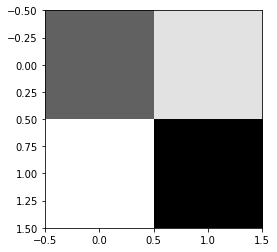

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
plt.imshow(cm, cmap='binary')

# saving the train model

In [46]:
model.save('/content/drive/MyDrive/Alma Submission/AlmaBetter/Cohort Aravali/Module 3/Week 3/Day 4/model.h5')